<a href="https://colab.research.google.com/github/gustavox0/MasterBigData/blob/main/M2_AG_Grupo17_VP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monto la carpeta de drive para trabajar los archivos desde ahí
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **M2_AG_Grupo 17**
Alumnos:
    
    Roger Herrera Delgado
    Gustavo Salazar Monjarás

Fecha: 24/02/2025
---
---

# **Índice**

---
---
> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&uniqifier=1) \\
> [Ejercicio 1:](#scrollTo=1J4h6kTngjn5&uniqifier=1) Ajustar un modelo de regresión lineal (esto implica escribir la fórmula y su sustitución). Obtener una estimación de los parámetros del modelo y la interpretación de los parámetros. (85%) \\

> [Ejercicio 2:](#scrollTo=f8-7S_dkzbHu&uniqifier=1) ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros? (10%) \\

> [Ejercicio 3:](#scrollTo=TDTEEolrA9ql&uniqifier=1)
Evaluar el modelo a través de la SCE y el coeficiente de determinación. (5%) \\

In [2]:
#importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargo la base de covid
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tema1MBDDS/datos_ventas.csv', sep = ';')
print(df)

#tamaño del df
print(df.shape)

#revision general de los datos
for i in df.columns:
  print(i, ":", df[i].dtype)


    Fecha_anual Inversion Ventas
0          1980      1,00   4,61
1          1981      1,50   5,18
2          1982      2,00   5,09
3          1983      2,50   5,44
4          1984      3,00   0,62
5          1985      3,50   6,39
6          1986      4,00   0,64
7          1987      4,50   7,04
8          1988      5,00   7,13
9          1989      5,50   7,48
10         1990      6,00   8,01
11         1991      6,50   7,82
12         1992      7,00   8,22
13         1993      7,50   8,86
14         1994      8,00   9,10
15         1995      8,50   9,78
16         1996      9,00   9,82
17         1997      9,50  10,05
18         1998     10,00  11,12
19         1999     10,50  11,04
20         2000     11,00  11,47
21         2001     11,50  11,44
22         2002     12,00  12,01
23         2003     12,50  12,53
24         2004     13,00  12,56
25         2005     13,50  12,33
26         2006     14,00  13,40
27         2007     14,50  13,83
28         2008     15,00  14,10
29        

# Preparación del entorno

Una empresa os ha facilitado las inversiones y las ventas (en millones de euros) obtenidas desde el año 1980 hasta 2017.

* **Clasificación de las variables**

El análisis del tipo de datos es el siguiente:

    -Fecha_anual: Identifica el año al que corresponde cada observacion. Variable categórica
    -Inversion: Montos de inversión destinados por la empresa. Variable cuantitativa continua (float)
    -Ventas: Ventas realizadas por la empresa. Variable cuantitativa continua (float)


Debido a que la cantidad de datos que contiene este dataset es poca permite realizar una inspección visual de los datos, de los cuales es destacable que se encuentran completos en el periodo de tiempo establecido (1980-2017). Es decir, no contiene "NA".

Notese que el tipo de dato para las variables Inversion y Ventas no es el correcto según la clasificación antes mencionada, por lo que se transformarán dichos datos de object a float. Además, cabe mencionar que la variable Fecha_anual se encuentra en formato int64 por lo que se trabajará con métodos compatibles a este tipo de dato.


In [3]:
#Se convertirá el tipo de datos de las variables Inversion y Ventas a float. En este caso se debe cambiar las ,s por .s para que la transformación se realice de forma correcta.
x = {"Inversion", "Ventas"}
for i in x:
  df[i] = df[i].str.replace(',', '.')
  df[i] = pd.to_numeric(df[i]).astype(float)

In [4]:
#revision general de los datos
print(df.head(10))
for i in df.columns:
  print(i, ":", df[i].dtype) #los tipos de las variables ya son float

   Fecha_anual  Inversion  Ventas
0         1980        1.0    4.61
1         1981        1.5    5.18
2         1982        2.0    5.09
3         1983        2.5    5.44
4         1984        3.0    0.62
5         1985        3.5    6.39
6         1986        4.0    0.64
7         1987        4.5    7.04
8         1988        5.0    7.13
9         1989        5.5    7.48
Fecha_anual : int64
Inversion : float64
Ventas : float64


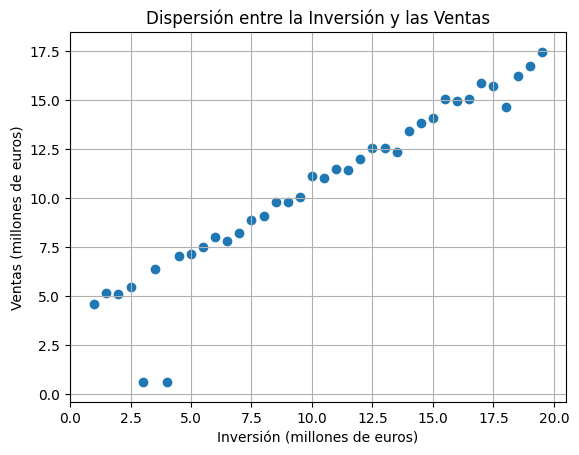

In [32]:
#Observamos la relación entre las Ventas y la Inversión
# raw data
ventas = df["Ventas"]
inversion = df["Inversion"]

# labels
plt.title("Dispersión entre la Inversión y las Ventas")
plt.xlabel("Inversión (millones de euros)")
plt.ylabel("Ventas (millones de euros)")

# limits
plt.xlim(inversion.min()-1 , inversion.max()+1 )
plt.ylim(ventas.min()-1 , ventas.max()+1 )

plt.scatter(inversion,ventas)
plt.grid(True)
plt.show()

Como se puede observar de la gráfica existe una relación lineal entre la Inversión y las Ventas. Además, se puede observar cómo la mayoría de los puntos muestran una clara relación lineal, excepto por dos puntos que sobresalen. Estos puntos corresponden a las ventas de 1984 y 1986 en los que, a pesar de mantener los niveles de inversión, las ventas fueron inusualmente bajas para la empresa. Ello pudo deberse quizás a una contracción de la economía local.  Para mejorar el ajuste del modelo se recomienda excluir dichos valores para el cálculo del ajuste por regresión lineal. <br> Además de la relación lineal observada, vamos a utilizar la correlación y la covarianza entre ambas variables para ver el grado de relacion entre ellas y en qué sentido afecta la inversión a las ventas. La correlación se estima para el dataset completo así como para el dataset filtrado que no considera las observaciones correspondientes a 1984 y 1986.

In [5]:
# Correlacion
correlacion = df.corr(method="pearson")["Inversion"]["Ventas"]
print("Pearson: ",correlacion)

df_filtrado = df[df['Ventas']>2.5] #filtramos las observaciones de 1984 y 1986
correlacion2 = df_filtrado.corr(method="pearson")["Inversion"]["Ventas"]
print("Pearson sin outliers: ",correlacion2)

print("Mejora de la correlacion: ",round((correlacion2-correlacion)*100/correlacion,2), "%")

#covarianza
covarianza = df.cov()["Inversion"]["Ventas"]
print("Covarianza: ", covarianza)

Pearson:  0.9562823420491507
Pearson sin outliers:  0.9953472185255251
Mejora de la correlacion:  4.09 %
Covarianza:  22.92993243243243


Al revisar la correlación entre variables se respalda lo observado en la gráfica pues se obtienen valores superiores a 0.95 por lo que existe una relación lineal fuerte entre las variables. Además, con el cálculo de la covarianza se sabe que es de tipo positiva (covarianza > 0) por lo que a mayor inversión se espera una mayor cantidad de ventas.

Cabe destacar que las variables presentan una mejor correlación (4% aproximadamente) al eliminar los dos valores correspondientes a 1984 y 1986 pues estos se comportan como outliers separándose completamente del comportamiento de las variables. Se vuelve interesante analizar dichos años a detalle para entender las condiciones particulares que generaron tan pocas ventas a pesar de contar con una inversión considerable.

De acá en adelante el modelo que se trabajará es el modelo filtrado sin incluir los outliers. Además, como ejercicio académico se generará el modelo sin filtrar con fines comparativos.

# Ejercicio 1: Ajustar un modelo de regresión lineal (esto implica escribir la fórmula y su sustitución). Obtener una estimación de los parámetros del modelo y la interpretación de los parámetros. (85%)

Como se analizó anteriormente las variables se pueden ajustar linealmente, por esta razón se buscará predecir el comportamiento de la variable Ventas en relación con la Inversión. Para esto, se puede generar una función del tipo:

$$ \bbox[5px,border: 2px solid blue]{
      y_t = \beta_{0} + \beta_{1}x_t + \varepsilon_t
} $$

Cabe destacar que esta función implica una parte determinística $$\beta_{0} + \beta_{1}x_t$$, y una parte aleatoria $$\varepsilon_t$$

<ipython-input-6-fe51fc4ca1a2>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


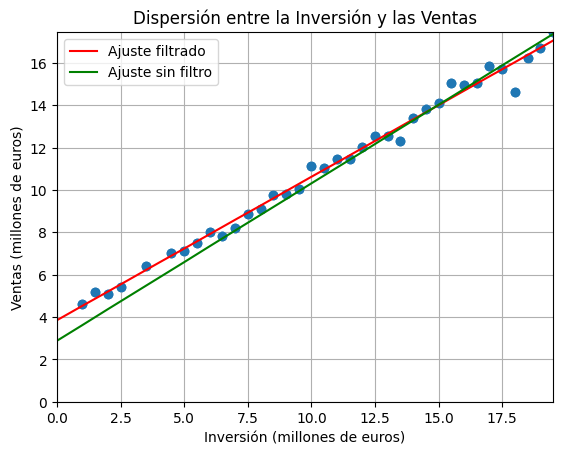

El modelo matemático que describe la inversión vs las ventas está descrito por los siguientes parámetros: 
 Pendiente (β1):  0.6769242723088879 
 Coeficiente (β0) 3.848512940051398 
 p-value:  3.8578864430424016e-36 
 Error:  0.011238066273231016
El modelo matemático que describe la inversión vs las ventas está descrito por los siguientes parámetros: 
 Pendiente (β1):  0.7426698763540868 
 Coeficiente (β0) 2.8805285042127142 
 p-value:  8.25497955552195e-21 
 Error:  0.0378532029452961


In [6]:
from scipy import stats as ss

#linregress es el metodo para extraer la recta
pendiente, coeficiente, pearson, p, error = ss.linregress(df_filtrado["Inversion"],df_filtrado["Ventas"])

#Modelo matematico
def recta(x):
    return np.round(coeficiente + pendiente*x,2)

recta = np.vectorize(recta)
linea = recta(np.arange(3000))

#calculo del modelo sin filtro:
#linregress es el metodo para extraer la recta
pendiente1, coeficiente1, pearson1, p1, error1 = ss.linregress(df["Inversion"],df["Ventas"])
#Modelo matematico sin filtro
def recta1(x):
    return np.round(coeficiente1 + pendiente1*x,2)
recta1 = np.vectorize(recta1)
linea1 = recta1(np.arange(3000))

# labels
plt.title("Dispersión entre la Inversión y las Ventas")
plt.xlabel("Inversión (millones de euros)")
plt.ylabel("Ventas (millones de euros)")
plt.legend()

# limits
plt.xlim(0 , df_filtrado["Inversion"].max() )
plt.ylim(0 , df_filtrado["Ventas"].max() )

# Nube de puntos + recta de regresión

plt.scatter(df_filtrado["Inversion"],df_filtrado["Ventas"])
colores= ['blue', 'red']
plt.plot(df_filtrado["Inversion"], df_filtrado["Ventas"], 'o' )
plt.plot(linea , color='red',label='Ajuste filtrado')
#recta de regresión sin filtro
plt.plot(linea1 , color='green',label='Ajuste sin filtro')
plt.legend()
plt.grid(True)
plt.show()
print("El modelo matemático que describe la inversión vs las ventas está descrito por los siguientes parámetros: \n", "Pendiente (β1): " ,pendiente,"\n Coeficiente (β0)", coeficiente, "\n p-value: ", p, "\n Error: ",error)
print("El modelo matemático que describe la inversión vs las ventas está descrito por los siguientes parámetros: \n", "Pendiente (β1): " ,pendiente1,"\n Coeficiente (β0)", coeficiente1, "\n p-value: ", p1, "\n Error: ",error1)


Como se puede observar de la gráfica, la línea del modelo se ajusta de buena manera a la nube de puntos pues en su mayoría todos los puntos se encuentran muy cercanos a la misma. Además, al comparar ambos modelos se puede observar como el modelo sin filtrar (color verde) presenta un peor ajuste pues a simple viste se observa como una mayor cantidad de puntos tienen contacto con el modelo filtrado (color rojo)

Los parámetros del modelo se interpretan de la siguiente manera para el caso del modelo filtrado:

    -Pendiente (β1) =  0.6769242723088879 : esta es la magnitud en la que se espera que aumenten, en promedio, las ventas cuando se incrementa la inversión. Es decir, se espera que un aumento de un millón de euros en la inversion incremente las ventas, en promedio, en 0.677 millones de euros.
                                            Además, gráficamente representa la pendiente de la recta.
    -Coeficiente (β0) 3.848512940051398   : esta es la intercepción de la recta con el eje X, es decir este es el valor de ventas que se espera con una inversión de 0.
                                            Es importante aclarar que este es el significado literal del modelo mas en la realidad muchas veces esa interpretación no es real pues muchas veces no es posible invertir 0 y generar ventas.
    -p-value:  3.8578864430424016e-36     : el p-value < 0.05 implica que se rechaza la hipotesis nula h0 correspondiente a que la pendiente es igual a 0 lo que implica que las variables sean independientes, por lo que se puede asegurar que la pendiente es significativamente distinta de 0.
    -Error:  0.011238066273231016         : el error estandar de la regresión, generalmente cuando el valor es pequeño se dice que la regresión es precisa, a pesar de esto debemos tener en cuenta que las unidades de los datos usados en la regresión son en millones por lo que el error a pesar de ser un valor "pequeño" puede implicar cifras importantes en la vida real.





## Ejercicio 2: ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros? (10%)


Anteriormente se definió el modelo que predice el comportamiento de las ventas en base a la inversión realizada como:
$$
Ventas = 0.6769242723088879 * {\text{Inversion} + 3.848512940051398 }
$$


In [7]:
inv = 7
ventas7 = round(recta(inv).item(),2)
print("Las ventas promedio estimadas para una inversión de 7 millones de euros son de: ", ventas7, " millones de euros")

Las ventas promedio estimadas para una inversión de 7 millones de euros son de:  8.59  millones de euros


##Ejercicio 3: Evaluar el modelo a través de la SCE y el coeficiente de determinación. (5%)

In [8]:
#calculo de SCE
SCE = sum((df_filtrado["Ventas"] - recta(df_filtrado["Inversion"]))**2)
print("SCE: ", SCE)
#calculo de SCT
SCT = sum((df_filtrado["Ventas"] - df_filtrado["Ventas"].mean())**2)
print("SCT: ", SCT)
#calculo de R2
R2 = 1- SCE/SCT

#calculo con la formula extensa mas que todo por comprobacion personal mas claramente es mas eficiente el calculo anterior
# Valores predichos por el modelo
y_predicho = recta(df_filtrado["Inversion"])
# Media de los valores reales
y_media = np.mean(df_filtrado['Ventas'])
# Suma de Cuadrados de la Regresión (SCR) → Numerador
SCR = np.sum((y_predicho - y_media) ** 2)
# Cálculo del coeficiente de determinación R²
R22 = SCR / SCT
print("R²: ", R2)

#evaluacion del ajuste para los datos no filtrados
#calculo de SCE
SCE1 = sum((df["Ventas"] - recta1(df["Inversion"]))**2)
#calculo de SCT
SCT1 = sum((df["Ventas"] - df["Ventas"].mean())**2)
#calculo de R2
R21 = 1- SCE1/SCT1
#imprimo los resultados
print("\nSCE sin filtro: ", SCE1, "\nSCT sin filtro: ", SCT1,"\nR² sin filtro: ", R21)


SCE:  4.484299999999999
SCT:  483.65187499999996
R²:  0.9907282484948498

SCE sin filtro:  58.9466 
SCT sin filtro:  689.0139815789473 
R² sin filtro:  0.914447889918115


El SCE es una medida de ajuste que evalua que tanto se alejan los resultados del modelo respecto a los reales, en este caso se obtuvo un valor de SCE= 4.48, el cual en comparación con SCT = 483.65 es un valor bajo. El SCT evalua la variabilidad de los datos. Por lo que mediante la evaluación de SCE se dice que el modelo se ajusta de buena forma ya que los errores respecto al modelo y los valores observados es baja.

Además, al realizar el cálculo del coeficiente de determinación (R²) se obtuvo un valor de R² =  0.9907, este valor es muy cercano a 1 lo cual indica un ajuste bueno y se puede decir además que el 99.07% de la variabilidad de las ventas es explicada por la inversión.

Es por estas razones que se dice que el modelo tiene un buen ajuste y que es confiable para realizar predicciones. Además, mediante estas medidas se puede cuantificar el aporte del filtrado inicial de los datos que mejoró el ajuste del modelo en cerca del 7.5%.

`